In [1]:
# Shiyi (Amy) Qin and Victor Z
# UW-Madison, 2024
# illustrate fourier transform

## Start here if working on google collab

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [4]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [5]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Parameters
L = 500  # length of signal
Fs = 1000  # Hz (sampling frequency)
T = 1 / Fs  # sec (sampling period)
t = np.arange(L) * T  # time vector
om = Fs * np.arange(L // 2 + 1) / L  # frequency vector

In [8]:
# Generate signal
f1 = np.sin(2 * np.pi * 30 * t)  # low frequency
f2 = np.sin(2 * np.pi * 60 * t)  # high frequency
f = f1 + f2  # combined signal

In [9]:
# Compute Fourier Transform
fh = np.fft.fft(f)
m = np.abs(fh)  # magnitude
mf = m[:L // 2 + 1]  # eliminate symmetry
mf[1:-1] = 2 * mf[1:-1]

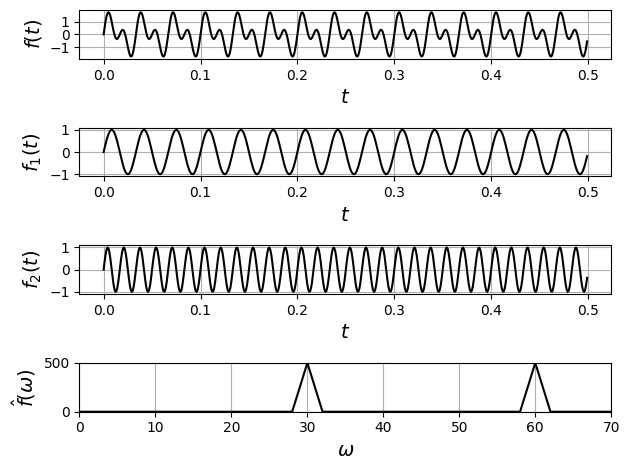

In [11]:
# Visualize signal
plt.figure()
plt.subplot(4, 1, 1)
plt.plot(t, f, 'k', linewidth=1.5)
plt.ylabel('$f(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, f1, 'k', linewidth=1.5)
plt.ylabel('$f_1(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, f2, 'k', linewidth=1.5)
plt.ylabel('$f_2(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(om, mf, 'k', linewidth=1.5)
plt.ylabel('$\\hat{f}(\\omega)$', fontsize=14)
plt.xlabel('$\\omega$', fontsize=14)
plt.axis([0, 70, 0, max(mf)])
plt.grid(True)

plt.tight_layout()
plt.show()

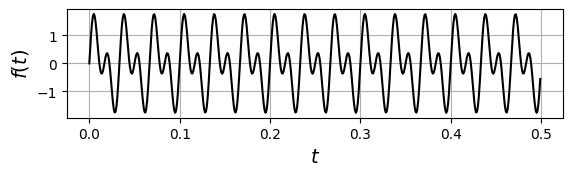

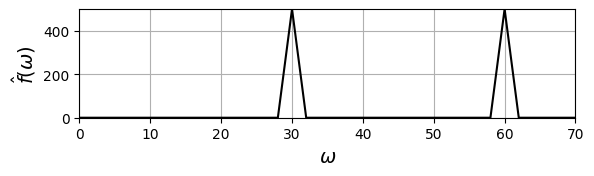

In [12]:
# Visualize signal in time and frequency domain
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, f, 'k', linewidth=1.5)
plt.ylabel('$f(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.grid(True)

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(om, mf, 'k', linewidth=1.5)
plt.ylabel('$\\hat{f}(\\omega)$', fontsize=14)
plt.xlabel('$\\omega$', fontsize=14)
plt.axis([0, 70, 0, max(mf)])
plt.grid(True)

In [13]:
# Generate filter
g = np.sin(2 * np.pi * 30 * t)  # signal
gh = np.fft.fft(g)  # compute DFT
m = np.abs(gh)  # magnitude
mg = m[:L // 2 + 1]
mg[1:-1] = 2 * mg[1:-1]

In [ ]:
plt.figure()
plt.subplot(3, 1, 2)
plt.plot(t, g, 'k', linewidth=1.5)
plt.ylabel('$g(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.grid(True)

plt.figure()
plt.subplot(3, 1, 2)
plt.plot(om, mg, 'k', linewidth=1.5)
plt.ylabel('$\\hat{g}(\\omega)$', fontsize=14)
plt.xlabel('$\\omega$', fontsize=14)
plt.axis([0, 70, 0, max(mg)])
plt.grid(True)


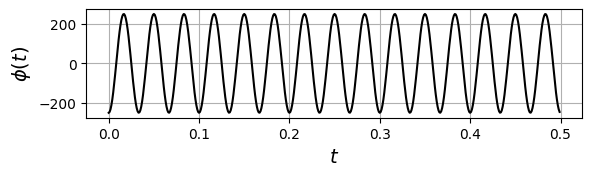

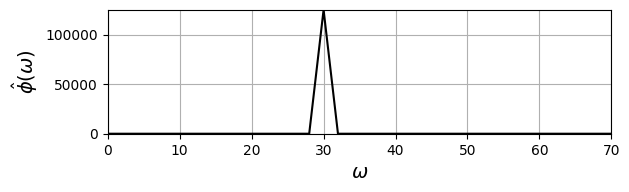

In [14]:
# Perform product of FFT signals to obtain filtered signal
phih = fh * gh  # signal in frequency domain
phi = np.fft.ifft(phih)  # signal in time domain
m = np.abs(phih)  # magnitude
mphi = m[:L // 2 + 1]
mphi[1:-1] = 2 * mphi[1:-1]

plt.figure()
plt.subplot(3, 1, 3)
plt.plot(t, phi.real, 'k', linewidth=1.5)
plt.ylabel('$\\phi(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.grid(True)

plt.figure()
plt.subplot(3, 1, 3)
plt.plot(om, mphi, 'k', linewidth=1.5)
plt.ylabel('$\\hat{\\phi}(\\omega)$', fontsize=14)
plt.xlabel('$\\omega$', fontsize=14)
plt.axis([0, 70, 0, max(mphi)])
plt.grid(True)

plt.tight_layout()
plt.show()